<a href="https://colab.research.google.com/github/RainaVardhan/project_voting/blob/main/clean_voting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! git clone https://github.com/RainaVardhan/project_voting


Cloning into 'project_voting'...
remote: Enumerating objects: 103, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 103 (delta 25), reused 20 (delta 15), pack-reused 67
Receiving objects: 100% (103/103), 31.82 MiB | 5.74 MiB/s, done.
Resolving deltas: 100% (49/49), done.
Updating files: 100% (44/44), done.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('/content/project_voting/data/voting_VA.csv')
#df.head()

# check for nan values
print(df.isnull().values.any())

# check for possible mistakes
df[df['totalvotes'] == 0]

False


,Unnamed: 0,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
2030,49179,2016,VIRGINIA,VA,BEDFORD,51515,US PRESIDENT,HILLARY CLINTON,DEMOCRAT,0,0,20220315,TOTAL
2031,49180,2016,VIRGINIA,VA,BEDFORD,51515,US PRESIDENT,DONALD TRUMP,REPUBLICAN,0,0,20220315,TOTAL
2032,49181,2016,VIRGINIA,VA,BEDFORD,51515,US PRESIDENT,OTHER,OTHER,0,0,20220315,TOTAL


In [5]:
# split the dataframe into each year
votes_2012 = df[df['year']==2012]
votes_2016 = df[df['year']==2016]
votes_2020 = df[df['year']==2020]

# find out which party got the most votes in each county
winners_2012_idx = votes_2012.groupby('county_name')['candidatevotes'].idxmax() # find maximum number of candidatevotes for county using idxmax
winners_2012 = votes_2012.loc[winners_2012_idx]
winners_2016_idx = votes_2016.groupby('county_name')['candidatevotes'].idxmax()
winners_2016 = votes_2016.loc[winners_2016_idx]
winners_2020_idx = votes_2020.groupby('county_name')['candidatevotes'].idxmax()
winners_2020 = votes_2020.loc[winners_2020_idx]

# combine the dataframes into 1
winners_all = pd.concat([winners_2012,winners_2016,winners_2020])

winners_all


,Unnamed: 0,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
1341,39541,2012,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,MITT ROMNEY,REPUBLICAN,8213,16051,20220315,TOTAL
1343,39543,2012,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,BARACK OBAMA,DEMOCRAT,29757,53907,20220315,TOTAL
1625,39825,2012,VIRGINIA,VA,ALEXANDRIA,51510,US PRESIDENT,BARACK OBAMA,DEMOCRAT,52199,73411,20220315,TOTAL
1347,39547,2012,VIRGINIA,VA,ALLEGHANY,51005,US PRESIDENT,MITT ROMNEY,REPUBLICAN,3595,7173,20220315,TOTAL
1350,39550,2012,VIRGINIA,VA,AMELIA,51007,US PRESIDENT,MITT ROMNEY,REPUBLICAN,4331,6915,20220315,TOTAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3712,71947,2020,VIRGINIA,VA,WILLIAMSBURG CITY,51830,US PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,4035,6890,20220315,ABSENTEE
3724,71959,2020,VIRGINIA,VA,WINCHESTER CITY,51840,US PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,5093,12113,20220315,ABSENTEE
3257,71492,2020,VIRGINIA,VA,WISE,51195,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,6984,16615,20220315,ABSENTEE
3270,71505,2020,VIRGINIA,VA,WYTHE,51197,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,7751,15073,20220315,ELECTION DAY


In [6]:
votes_2016[votes_2016['county_name'] == 'BEDFORD']
# the 0 values seems to be an accidental double entry = don't have to clean

,Unnamed: 0,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
1769,48918,2016,VIRGINIA,VA,BEDFORD,51019,US PRESIDENT,HILLARY CLINTON,DEMOCRAT,9768,42525,20220315,TOTAL
1770,48919,2016,VIRGINIA,VA,BEDFORD,51019,US PRESIDENT,DONALD TRUMP,REPUBLICAN,30659,42525,20220315,TOTAL
1771,48920,2016,VIRGINIA,VA,BEDFORD,51019,US PRESIDENT,OTHER,OTHER,2098,42525,20220315,TOTAL
2030,49179,2016,VIRGINIA,VA,BEDFORD,51515,US PRESIDENT,HILLARY CLINTON,DEMOCRAT,0,0,20220315,TOTAL
2031,49180,2016,VIRGINIA,VA,BEDFORD,51515,US PRESIDENT,DONALD TRUMP,REPUBLICAN,0,0,20220315,TOTAL
2032,49181,2016,VIRGINIA,VA,BEDFORD,51515,US PRESIDENT,OTHER,OTHER,0,0,20220315,TOTAL


In [12]:
votes_2012.head()

,Unnamed: 0,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
1340,39540,2012,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,BARACK OBAMA,DEMOCRAT,7655,16051,20220315,TOTAL
1341,39541,2012,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,MITT ROMNEY,REPUBLICAN,8213,16051,20220315,TOTAL
1342,39542,2012,VIRGINIA,VA,ACCOMACK,51001,US PRESIDENT,OTHER,OTHER,183,16051,20220315,TOTAL
1343,39543,2012,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,BARACK OBAMA,DEMOCRAT,29757,53907,20220315,TOTAL
1344,39544,2012,VIRGINIA,VA,ALBEMARLE,51003,US PRESIDENT,MITT ROMNEY,REPUBLICAN,23297,53907,20220315,TOTAL


<Axes: xlabel='totalvotes', ylabel='Density'>

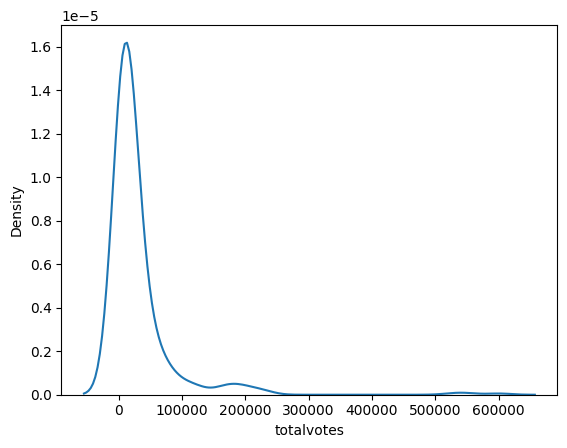

In [26]:
var = 'totalvotes'
sns.kdeplot(winners_all[var])

<Axes: xlabel='candidatevotes', ylabel='Density'>

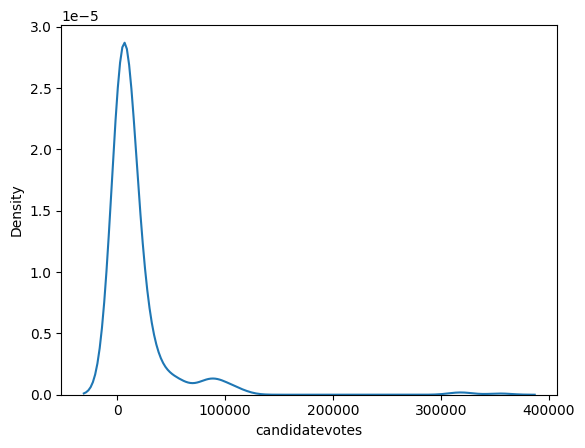

In [25]:
var = 'candidatevotes'
sns.kdeplot(winners_all[var])

<Axes: ylabel='candidatevotes'>

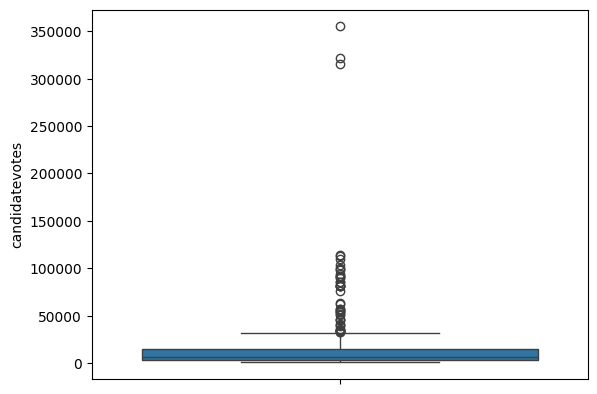

In [27]:
var = 'candidatevotes'
sns.boxplot(winners_all[var])

<Axes: ylabel='totalvotes'>

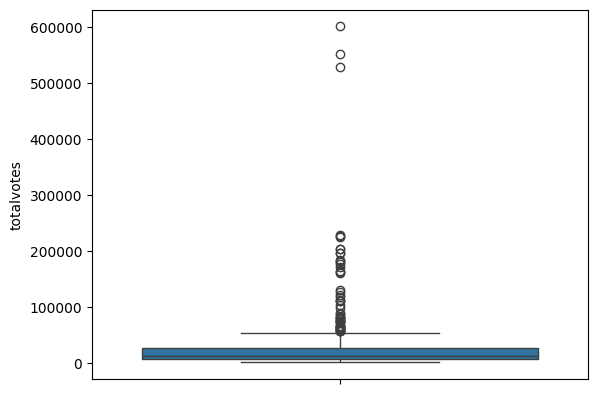

In [28]:
var = 'totalvotes'
sns.boxplot(winners_all[var])

<Axes: xlabel='totalvotes', ylabel='candidatevotes'>

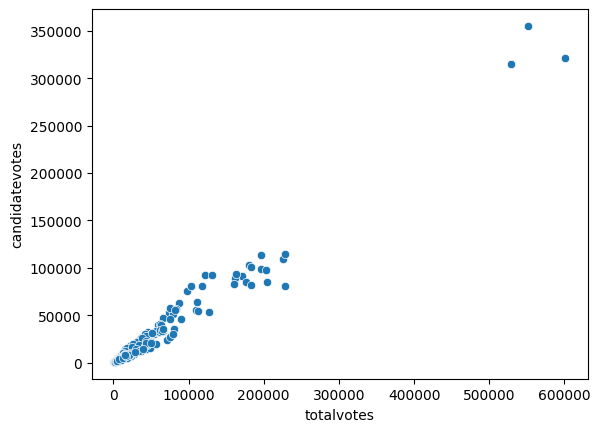

In [29]:
var1 = 'totalvotes'
var2 = 'candidatevotes'
sns.scatterplot(x=winners_all[var1], y=winners_all[var2])